## Clustering
Clustering is a central component of the scRNA-seq analysis pipeline. To understand the data, we must identify cell types and states present. The first step of doing so is clustering. 

Clustering is performed on the highly variable gene data, dimensionality reduced by PCA, and embedded into a KNN graph. (see `sc.pp.pca()` and `sc.pp.neighbors()` functions used in the visualization section.


In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler
import rpy2.rinterface_lib.callbacks
import logging
from rpy2.robjects import pandas2ri
import anndata2ri
import doubletdetection as dd
from gseapy.plot import barplot, dotplot
import os, sys
import gseapy as gp
from anndata import AnnData

import scipy.stats
import diffxpy.api as de
import anndata
from batchglm.api.models.tf1.glm_nb import Simulator

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()


plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 0   # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white')
sc.logging.print_versions()
sc.logging.print_header()

# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
%load_ext rpy2.ipython

%matplotlib inline

plt.rcParams.update({'font.size': 22})

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

-----
anndata     0.7.5
scanpy      1.6.1
sinfo       0.3.1
-----
Crypto                                      3.10.1
OpenSSL                                     20.0.1
PIL                                         8.1.0
aa8f2297d25b4dc6fd3d98411eb3ba53823c4f42    NA
absl                                        NA
anndata                                     0.7.5
anndata2ri                                  1.0.6
appdirs                                     1.4.4
asciitree                                   NA
astunparse                                  1.6.3
backcall                                    0.2.0
backports                                   NA
batchglm                                    v0.7.4
bcrypt                                      3.2.0
beta_ufunc                                  NA
binom_ufunc                                 NA
bioservices                                 1.7.11
boto3                                       1.17.107
botocore                                    1

In [2]:
%%R
# Load libraries from correct lib Paths for my environment - ignore this!
#.libPaths("/home/dan/R/x86_64-pc-linux-gnu-library/4.03")
#Sys.setenv(R_INSTALL_STAGED = FALSE)

#sudo apt-get install aptitude

#sudo apt-get install libcurl4-openssl-dev

#sudo apt-get install libxml2-dev

# Load all the R libraries we will be using in the notebook
library(scran)
library(RColorBrewer)
#library(slingshot)
#library(monocle)
#library(gam)
library(clusterExperiment)
library(ggplot2)
library(plyr)
library(MAST)
#library(scCB2)
#library(DropletUtils)
library(Seurat)
library(NMF)
library(BiocFileCache)

In [3]:
import pickle

# Getting back the objects:
with open('adata_pca_umap.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    adata = pickle.load(f)

In [175]:
# Perform clustering - using highly variable genes
sc.tl.leiden(adata, resolution=0.9, key_added='leiden_r1', random_state=0)

... storing 'gene_id' as categorical


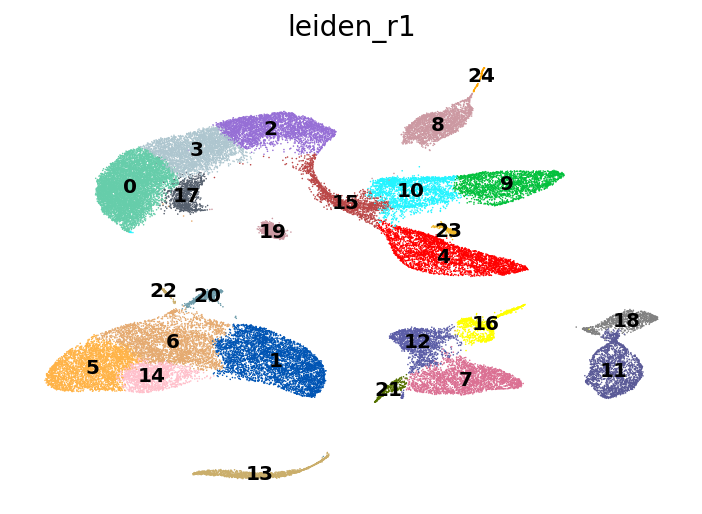

In [6]:
#Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['leiden_r1'], frameon=False, legend_loc = 'on data', 
           legend_fontsize = 10) 
           #save='clusteringleiden_r1_2.pdf')

In [7]:
mycolormap_26 = ["#66cdaa","#0054b4","#966fd6","#aec6cf","red",
                "#ffb347","#e5aa70","#db7093","#cc99a2", "#03c03c",
                "#24F4FF", "#5a5a97", "#5b5da7", "#caae6b", "pink",
                 "#ba4747",  "yellow", "#555f6d", "gray", "#cc99a2",
                "#6f9dab", "#557100", "#caae6b", "#f1b929", "orange"]

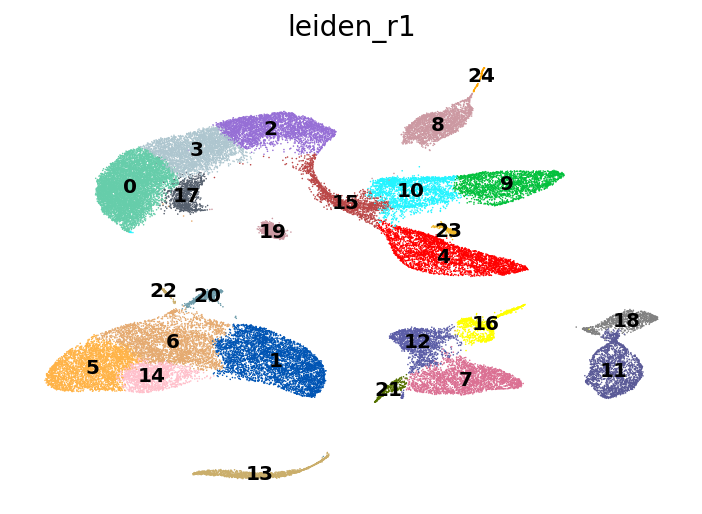

In [8]:
#Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['leiden_r1'], frameon=False, legend_loc = 'on data', 
           legend_fontsize = 10, palette = mycolormap_26, 
           save='clusteringleiden_r1_2.pdf')

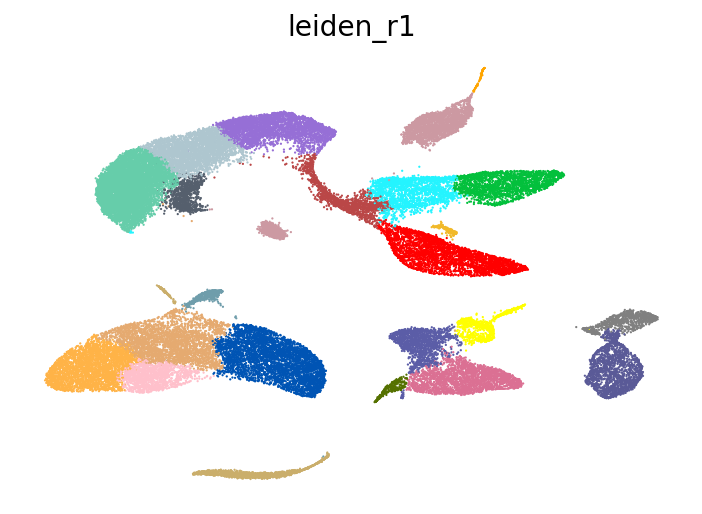

In [9]:
#Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['leiden_r1'], frameon=False, legend_loc = 'none', 
           legend_fontsize = 10, palette = mycolormap_26, 
           size = 5.0,
           save='clusteringleiden_r1_3.pdf')

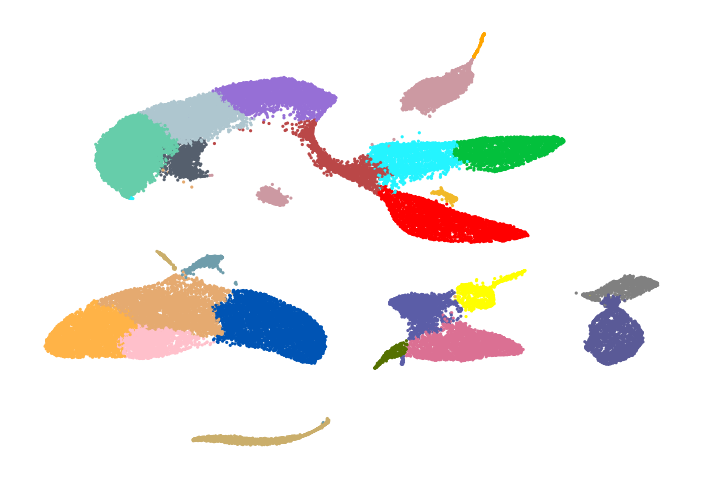

In [10]:
sc.pl.umap(adata, color='leiden_r1', size=10, legend_loc=None, 
           title = '', frameon=False,
           palette = mycolormap_26, 
           show = True, save = 'cluster_name4.pdf')

In [11]:
adata.var['gene_id']

EGFP3UTR                   hETV4
EGFP                        EGFP
CreERT2                  CreERT2
EYFP                        EYFP
hETV4                      hETV4
                       ...      
AC168977.2            AC168977.2
AC168977.1            AC168977.1
AC149090.1            AC149090.1
CAAA01118383.1    CAAA01118383.1
CAAA01147332.1    CAAA01147332.1
Name: gene_id, Length: 19854, dtype: category
Categories (19853, object): ['0610005C13Rik', '0610009B22Rik', '0610009O20Rik', '0610010F05Rik', ..., 'Zzef1', 'Zzz3', 'a', 'hETV4']

In [183]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('adata_leiden_r1.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(adata, f)

In [4]:
import pickle

# Getting back the objects:
with open('adata_leiden_r1.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    adata = pickle.load(f)

/home/dan/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/dan/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


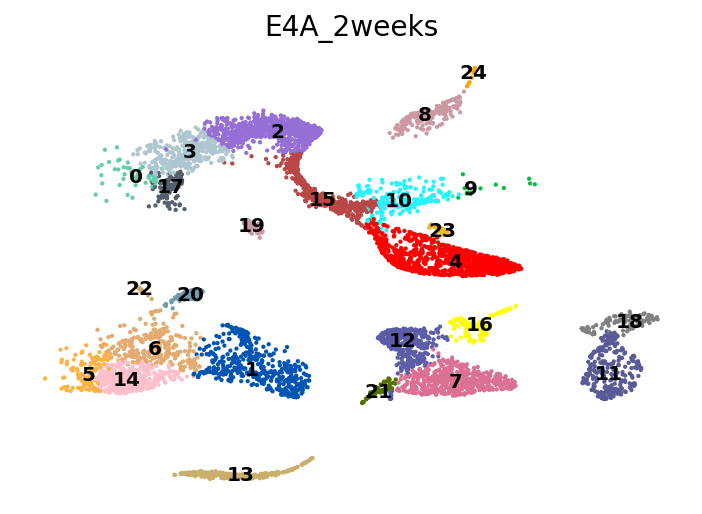

Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


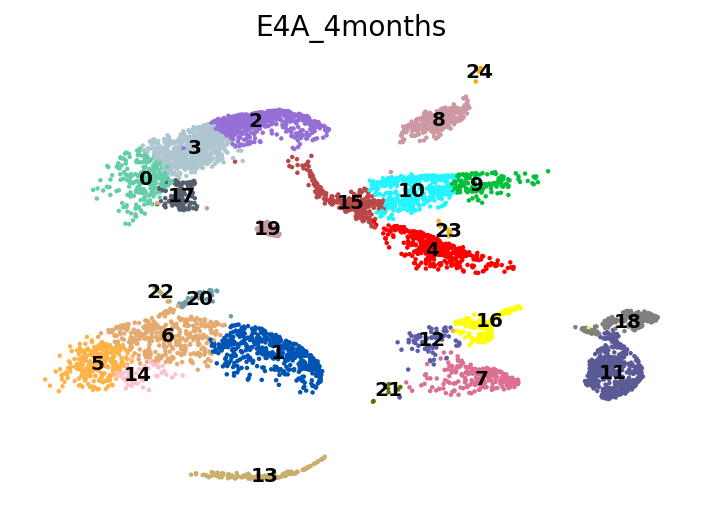

Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


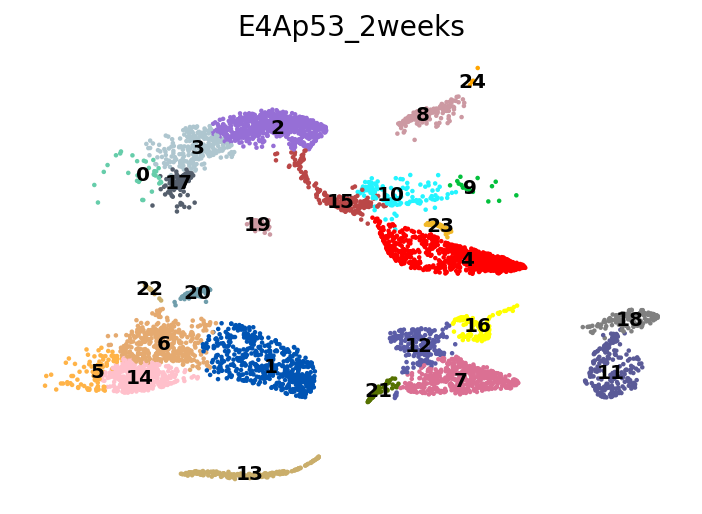

Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


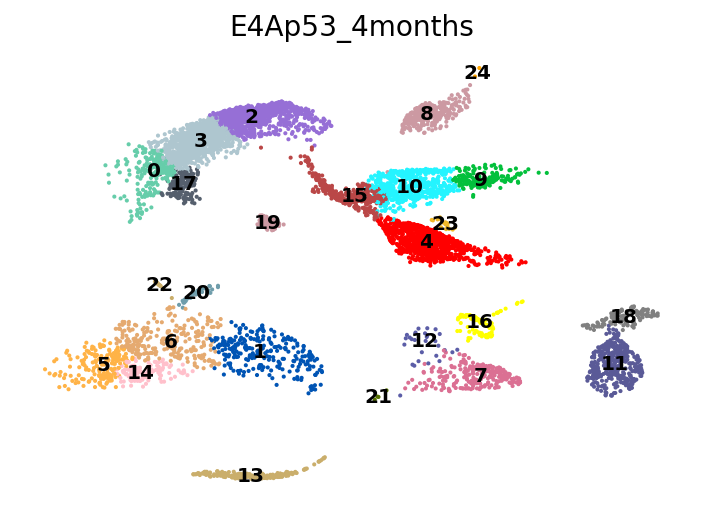

Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


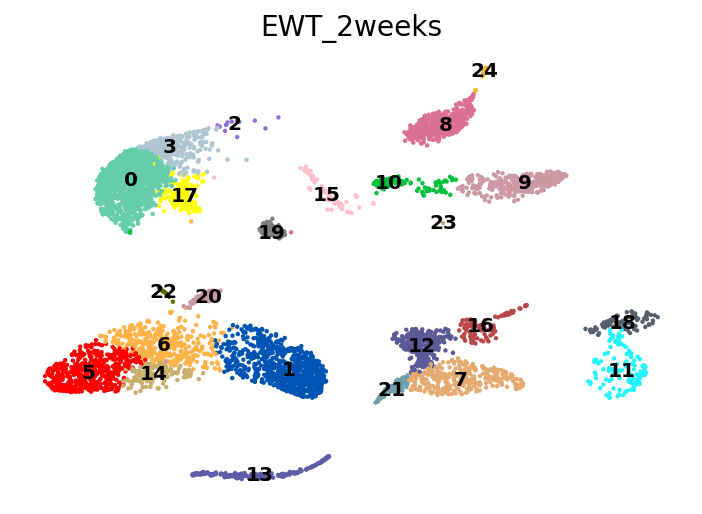

Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


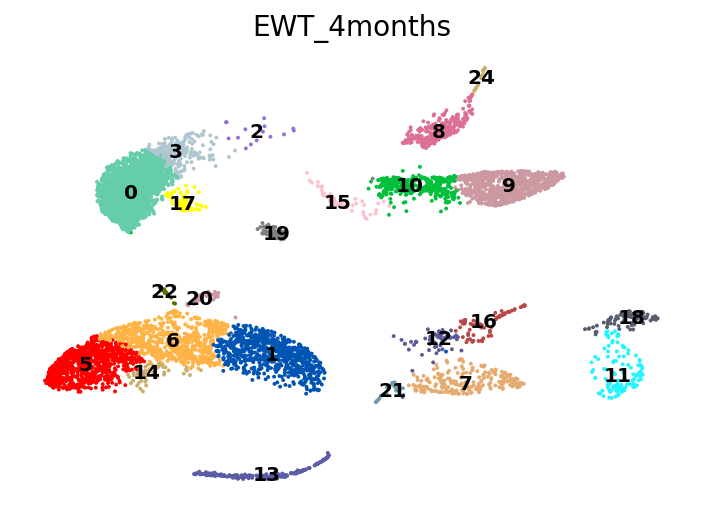

Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


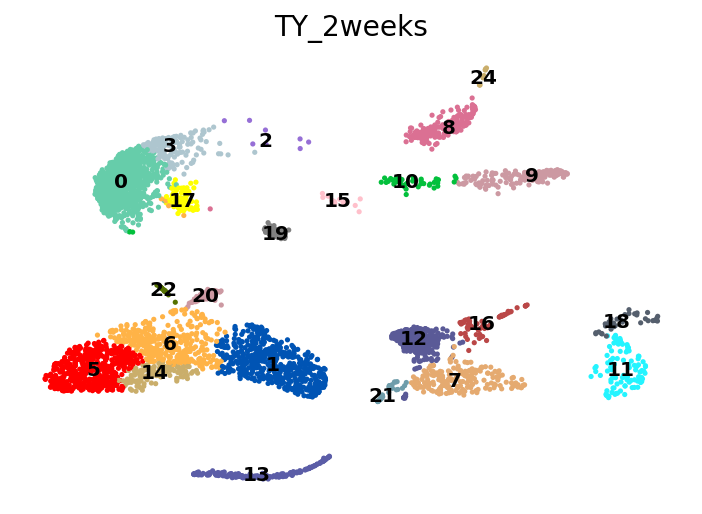

Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


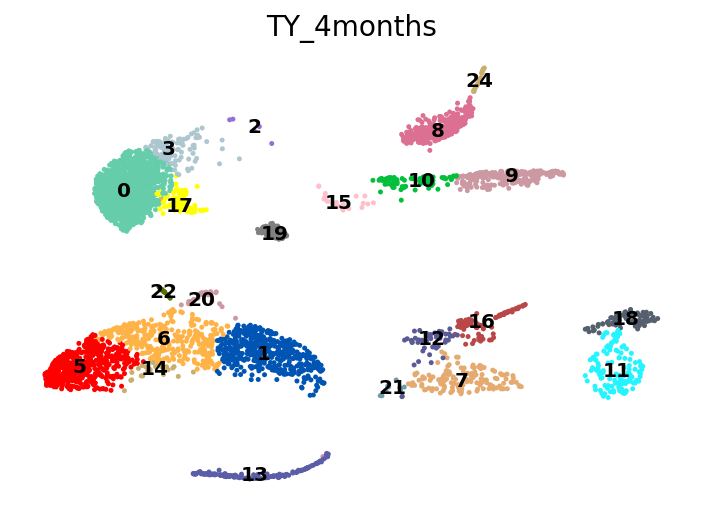

In [184]:
for i in range(8):
    sc.pl.umap(adata[adata.obs['genotype_age'] == adata.obs['genotype_age'].cat.categories[i]], 
               color = 'leiden_r1', title = adata.obs['genotype_age'].cat.categories[i],
               frameon=False, legend_loc = 'on data',
               legend_fontsize = 10,
               palette = mycolormap_26,
               save= adata.obs['genotype_age'].cat.categories[i]+'.png')

In [18]:
adata.obs['leiden_r1']

AAACCTGGTGAGTGAC      12
AAATGCCAGAAGATTC      12
AAGACCTGTGAAAGAG      11
AATCCAGAGAGGTAGA       5
ACACCAAAGCGTGAGT      12
                      ..
CTCGTCAGTAGAGTGC      12
ATCCGAAAGGTGTGGT-1     8
CCCAGTTAGGTACTCT       8
TGCGTGGAGTGGTCCC      15
CGTCACTCAAGCTGGA      15
Name: leiden_r1, Length: 48926, dtype: category
Categories (25, object): ['0', '1', '2', '3', ..., '21', '22', '23', '24']

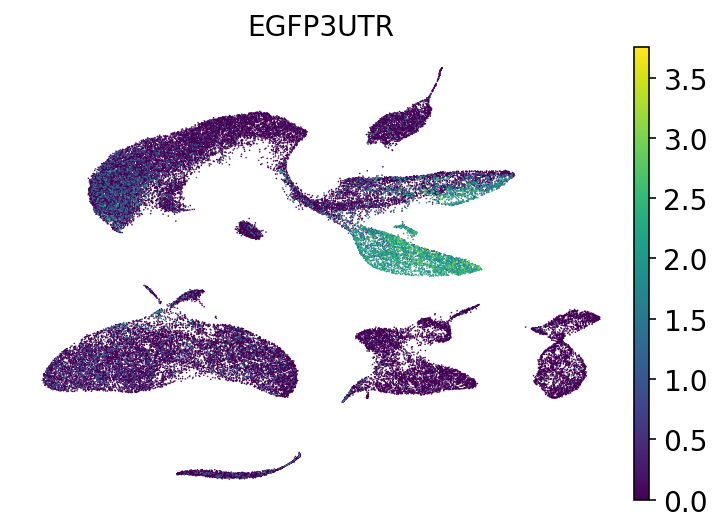

In [13]:
sc.pl.umap(adata, color=['hETV4'], frameon=False, 
           color_map=plt.cm.viridis, save ='hETV4.pdf')

At a resolution of 0.9 the broad clusters in the visualization are captured well in the data.

### Marker genes & cluster annotation

To annotate the clusters we obtained, we find genes that are up-regulated in the cluster compared to all other clusters (marker genes). This differential expression test is performed by a Welch t-test with overestimated variance to be conservative. This is the default in scanpy. The test is automatically performed on the `.raw` data set, which is uncorrected and contains all genes. All genes are taken into account, as any gene may be an informative marker.


In [187]:
adata.obs

,sample,age,batch,genotype_age,n_counts,log_counts,n_genes,mt_frac,doublet,doublet_score,S_score,G2M_score,phase,leiden_r1
AAACCTGGTGAGTGAC,TY,2weeks,1,TY_2weeks,2021.0,7.668561,941,0.055607,0.0,3.920398e-46,-0.026715,-0.119354,G1,12
AAATGCCAGAAGATTC,TY,2weeks,1,TY_2weeks,1515.0,7.372746,759,0.048367,0.0,3.920398e-46,-0.023157,-0.119676,G1,12
AAGACCTGTGAAAGAG,TY,2weeks,1,TY_2weeks,1638.0,7.427739,863,0.026159,0.0,1.090523e-68,-0.029725,0.066830,G2M,11
AATCCAGAGAGGTAGA,TY,2weeks,1,TY_2weeks,3136.0,8.070906,1497,0.020000,0.0,1.752931e-44,0.013308,-0.051707,S,5
ACACCAAAGCGTGAGT,TY,2weeks,1,TY_2weeks,2637.0,7.939159,1209,0.059893,0.0,2.543456e+02,0.109774,-0.120863,S,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTCGTCAGTAGAGTGC,E4Ap53,4months,3,E4Ap53_4months,8311.0,9.038959,2002,0.012938,0.0,1.286236e-02,-0.036352,-0.061798,G1,12
ATCCGAAAGGTGTGGT-1,E4Ap53,4months,3,E4Ap53_4months,6088.0,8.810460,1063,0.091885,0.0,5.653162e+00,0.041644,-0.104738,S,8
CCCAGTTAGGTACTCT,E4Ap53,4months,3,E4Ap53_4months,7895.0,9.002332,1357,0.027826,0.0,7.421237e+00,-0.028125,-0.104002,G1,8
TGCGTGGAGTGGTCCC,E4Ap53,4months,3,E4Ap53_4months,6009.0,8.826881,2361,0.118269,0.0,1.392403e-01,-0.060195,-0.007737,G1,15


In [188]:
#Calculate marker genes
sc.tl.rank_genes_groups(adata, groupby='leiden_r1', key_added='rank_genes_r1')

In [189]:
adata.uns['rank_genes_r1']['names']

rec.array([('Krt15', 'Dcn', 'Sfn', 'Sfn', 'Cd24a', 'Bgn', 'Lgals1', 'C1qb', 'Pate4', 'Tgm4', 'Krt18', 'Tmsb10', 'Fcer1g', 'Pecam1', 'Bgn', 'Krt19', 'Cd74', 'Apoe', 'Tmsb10', 'Cd24a', 'Igfbp7', 'C1qa', 'Sparc', 'Rcn1', 'Cd52'),
           ('Fxyd3', 'Serping1', 'Krt15', 'Krt15', 'Spint2', 'Lgals1', 'Igfbp7', 'C1qa', 'Svs5', '9530053A07Rik', '9530002B09Rik', 'H2-K1', 'Tyrobp', 'Tm4sf1', 'Igfbp7', 'Spint2', 'H2-Aa', 'Tmem176b', 'Srgn', 'Cldn7', 'Cald1', 'C1qc', 'Prnp', 'Epcam', 'Crisp1'),
           ('Hspb1', 'Timp2', 'Lgals7', 'Fxyd3', 'EGFP3UTR', 'Nbl1', 'Gsn', 'C1qc', 'Cdo1', 'Pbsn', 'Dnajc10', 'B2m', 'Lyz2', 'Ifitm3', 'Lgals1', 'Clu', 'H2-Ab1', 'Fxyd3', 'Vps37b', 'Ly6e', 'Gm13889', 'C1qb', 'Fxyd1', 'Tcn2', 'Spink8'),
           ...,
           ('Emp3', 'Krt18', 'Serping1', 'Lgals1', 'Serpinh1', 'F11r', 'Fxyd3', 'S100a6', 'Ifitm3', 'Anxa2', 'Vim', 'Cd63', 'Dcn', 'Perp', 'Fxyd3', 'Aebp1', 'Tshz2', 'Srgn', 'Cd63', 'Rbp1', 'Bcl2a1b', 'Galnt18', 'Tes', 'Tcf21', 'Casp4'),
           ('Vim', 

In [190]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('adata_leiden_r1_rank_genes.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(adata, f)

In [3]:
import pickle

# Getting back the objects:
with open('adata_leiden_r1_rank_genes.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    adata = pickle.load(f)

In [3]:
import pickle

# Getting back the objects:
with open('adata_cluster_annotations2.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    adata = pickle.load(f)

In [4]:
type(adata.obs['leiden_r1'].value_counts())

pandas.core.series.Series

In [5]:
adata.obs['genotype_age'].cat.categories[0]

'TY_2weeks'

In [6]:
adata.obs['genotype_age']

AAACCTGGTGAGTGAC           TY_2weeks
AAATGCCAGAAGATTC           TY_2weeks
AAGACCTGTGAAAGAG           TY_2weeks
AATCCAGAGAGGTAGA           TY_2weeks
ACACCAAAGCGTGAGT           TY_2weeks
                           ...      
CTCGTCAGTAGAGTGC      E4Ap53_4months
ATCCGAAAGGTGTGGT-1    E4Ap53_4months
CCCAGTTAGGTACTCT      E4Ap53_4months
TGCGTGGAGTGGTCCC      E4Ap53_4months
CGTCACTCAAGCTGGA      E4Ap53_4months
Name: genotype_age, Length: 48926, dtype: category
Categories (8, object): ['TY_2weeks', 'TY_4months', 'EWT_2weeks', 'EWT_4months', 'E4A_2weeks', 'E4A_4months', 'E4Ap53_2weeks', 'E4Ap53_4months']

In [7]:
adata.layers['counts'].shape

(48926, 19854)

In [8]:
adata.var.index

Index(['EGFP3UTR', 'EGFP', 'CreERT2', 'EYFP', 'hETV4', 'Xkr4', 'Rp1', 'Sox17',
       'Mrpl15', 'Lypla1',
       ...
       'Ccl21c', 'CR974586.5', 'AC132444.1', 'Csprs', 'AC125149.3',
       'AC168977.2', 'AC168977.1', 'AC149090.1', 'CAAA01118383.1',
       'CAAA01147332.1'],
      dtype='object', length=19854)

In [9]:
np.sum(adata.var.index.isin(['EGFP3UTR']))

1

In [10]:
adata.layers['counts'][:,adata.var.index.isin(['EGFP3UTR'])] > 0

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [11]:
np.sum(adata.layers['counts'][:,adata.var.index.isin(['EGFP3UTR'])] > 0)

9020

In [12]:
adata.obs['ETV4_status'] = adata.layers['counts'][:,adata.var.index.isin(['EGFP3UTR'])] > 0

In [13]:
adata.obs

,sample,age,batch,genotype_age,n_counts,log_counts,n_genes,mt_frac,doublet,doublet_score,S_score,G2M_score,phase,leiden_r1,ETV4_status
AAACCTGGTGAGTGAC,TY,2weeks,1,TY_2weeks,2021.0,7.668561,941,0.055607,0.0,3.920398e-46,-0.026715,-0.119354,G1,Macrophage_2,False
AAATGCCAGAAGATTC,TY,2weeks,1,TY_2weeks,1515.0,7.372746,759,0.048367,0.0,3.920398e-46,-0.023157,-0.119676,G1,Macrophage_2,False
AAGACCTGTGAAAGAG,TY,2weeks,1,TY_2weeks,1638.0,7.427739,863,0.026159,0.0,1.090523e-68,-0.029725,0.066830,G2M,T_cells_1,False
AATCCAGAGAGGTAGA,TY,2weeks,1,TY_2weeks,3136.0,8.070906,1497,0.020000,0.0,1.752931e-44,0.013308,-0.051707,S,Fibroblasts_2,False
ACACCAAAGCGTGAGT,TY,2weeks,1,TY_2weeks,2637.0,7.939159,1209,0.059893,0.0,2.543456e+02,0.109774,-0.120863,S,Macrophage_2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTCGTCAGTAGAGTGC,E4Ap53,4months,3,E4Ap53_4months,8311.0,9.038959,2002,0.012938,0.0,1.286236e-02,-0.036352,-0.061798,G1,Macrophage_2,False
ATCCGAAAGGTGTGGT-1,E4Ap53,4months,3,E4Ap53_4months,6088.0,8.810460,1063,0.091885,0.0,5.653162e+00,0.041644,-0.104738,S,Seminal_vesicle_1,False
CCCAGTTAGGTACTCT,E4Ap53,4months,3,E4Ap53_4months,7895.0,9.002332,1357,0.027826,0.0,7.421237e+00,-0.028125,-0.104002,G1,Seminal_vesicle_1,False
TGCGTGGAGTGGTCCC,E4Ap53,4months,3,E4Ap53_4months,6009.0,8.826881,2361,0.118269,0.0,1.392403e-01,-0.060195,-0.007737,G1,Luminal_4,False


In [14]:
adata[adata.obs['genotype_age'] == adata.obs['genotype_age'].cat.categories[0]].obs[['leiden_r1','ETV4_status']]

,leiden_r1,ETV4_status
AAACCTGGTGAGTGAC,Macrophage_2,False
AAATGCCAGAAGATTC,Macrophage_2,False
AAGACCTGTGAAAGAG,T_cells_1,False
AATCCAGAGAGGTAGA,Fibroblasts_2,False
ACACCAAAGCGTGAGT,Macrophage_2,False
...,...,...
AACTCCCTCTGGTGTA,Macrophage_2,False
GATCTAGTCATAACCG,Macrophage_2,False
GACGGCTTCGAATCCA,Macrophage_2,False
GTAGGCCCAAACCTAC,Macrophage_2,False


In [15]:
etv0 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[0]].obs[['leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[0])
etv0

leiden_r1          ETV4_status
Basal_1            False          1001
Fibroblasts_1      False           537
Basal_2            False             8
Basal_3            False           140
Fibroblasts_2      False           538
Fibroblasts_3      False           375
Macrophage_1       False           206
Seminal_vesicle_1  False           193
Luminal_2          False           177
Luminal_3          False            48
T_cells_1          False           103
Macrophage_2       False           379
Endothelial        False           190
Fibroblasts_4      False           125
Luminal_4          False            16
Dendritic_cells    False            63
Basal_4            False            82
T_cells_2          False            37
Luminal_5          False            90
Fibroblasts_5      False            62
Macrophage_3       False            31
Nerve_cells        False            25
Seminal_vesicle_2  False            11
Name: TY_2weeks, dtype: int64

In [49]:
etv0 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[0]].obs[['leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[0])
etv1 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[1]].obs[['leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[1])
etv2 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[2]].obs[['leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[2])
etv3 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[3]].obs[['leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[3])
etv4 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[4]].obs[['leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[4])
etv5 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[5]].obs[['leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[5])
etv6 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[6]].obs[['leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[6])
etv7 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[7]].obs[['leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[7])

In [50]:
clusternumber = pd.concat([etv0, etv1, etv2, etv3, etv4, etv5, etv6, etv7], axis=1, join="outer")
clusternumber

TY_2weeks  TY_4months  EWT_2weeks  EWT_4months  \
leiden_r1         ETV4_status                                                   
Basal_1           False           1001.0      1574.0       833.0       1739.0   
                  True               NaN         NaN       459.0        748.0   
Basal_2           False              8.0         5.0        11.0         13.0   
                  True               NaN         NaN         1.0          2.0   
Basal_3           False            140.0       114.0       296.0        220.0   
                  True               NaN         NaN        56.0         29.0   
Basal_4           False             82.0       131.0       137.0         51.0   
                  True               NaN         1.0        22.0         10.0   
Dendritic_cells   False             63.0        86.0       117.0         80.0   
                  True               NaN         NaN         5.0          1.0   
Endothelial       False            190.0       147.0       174.0        213.0   
                  True               NaN         NaN        26.0         14.0   
Fibroblasts_1     False            537.0       457.0       694.0        666.0   
                  True               NaN         NaN       118.0         91.0   
Fibroblasts_2     False            538.0       541.0       393.0        756.0   
                  True               NaN         NaN       121.0        225.0   
Fibroblasts_3     False            375.0       349.0       314.0        584.0   
                  True               NaN         NaN        51.0        128.0   
Fibroblasts_4     False            125.0        26.0       113.0         47.0   
                  True               NaN         NaN        26.0         11.0   
Fibroblasts_5     False             62.0        34.0        89.0         34.0   
                  True               NaN         NaN         9.0          5.0   
Luminal_1         False              NaN         NaN         NaN          NaN   
                  True               NaN         NaN         NaN          NaN   
Luminal_2         False            177.0       256.0       127.0        273.0   
                  True               NaN         1.0       237.0        677.0   
Luminal_3         False             48.0       100.0        73.0        197.0   
                  True               NaN         NaN        47.0        210.0   
Luminal_4         False             16.0        21.0        29.0         35.0   
                  True               NaN         NaN        36.0         20.0   
Luminal_5         False             90.0       169.0       108.0         79.0   
                  True               NaN         NaN        13.0          9.0   
Luminal_6         False              NaN         NaN         NaN          NaN   
                  True               NaN         NaN         1.0          NaN   
Macrophage_1      False            206.0       140.0       318.0        210.0   
                  True               NaN         NaN         5.0          7.0   
Macrophage_2      False            379.0        49.0       295.0         51.0   
                  True               NaN         NaN        14.0          5.0   
Macrophage_3      False             31.0        10.0        96.0         17.0   
                  True               NaN         NaN        17.0          6.0   
Nerve_cells       False             25.0        17.0        15.0         27.0   
                  True               NaN         NaN         NaN          2.0   
Seminal_vesicle_1 False            193.0       357.0       421.0        213.0   
                  True               NaN         NaN        56.0         47.0   
Seminal_vesicle_2 False             11.0        18.0        20.0         15.0   
                  True               NaN         NaN         1.0          1.0   
T_cells_1         False            103.0       136.0       121.0        114.0   
                  True               NaN         NaN         4

In [51]:
clusternumber.to_csv('clusternumber_ETV4_status.csv', sep=',')

#### with batch

In [16]:
etv0 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[0]].obs[['batch', 'leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[0])
etv1 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[1]].obs[['batch','leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[1])
etv2 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[2]].obs[['batch','leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[2])
etv3 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[3]].obs[['batch','leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[3])
etv4 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[4]].obs[['batch','leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[4])
etv5 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[5]].obs[['batch','leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[5])
etv6 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[6]].obs[['batch','leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[6])
etv7 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[7]].obs[['batch','leiden_r1','ETV4_status']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[7])

In [17]:
clusternumber = pd.concat([etv0, etv1, etv2, etv3, etv4, etv5, etv6, etv7], axis=1, join="outer")
clusternumber

TY_2weeks  TY_4months  EWT_2weeks  \
batch leiden_r1         ETV4_status                                      
1     Basal_1           False            313.0       343.0       303.0   
                        True               NaN         NaN       198.0   
      Basal_2           False              NaN         NaN         NaN   
                        True               NaN         NaN         1.0   
      Basal_3           False             75.0        18.0       107.0   
...                                        ...         ...         ...   
3     Seminal_vesicle_2 False              2.0         6.0         4.0   
      T_cells_1         False             34.0        34.0        22.0   
                        True               NaN         NaN         2.0   
      T_cells_2         False             14.0        16.0        19.0   
                        True               NaN         NaN         NaN   

                                     EWT_4months  E4A_2weeks  E4A_4months  \
batch leiden_r1         ETV4_status                                         
1     Basal_1           False              615.0         4.0        123.0   
                        True               299.0         4.0         30.0   
      Basal_2           False                4.0       231.0        247.0   
                        True                 NaN        13.0         12.0   
      Basal_3           False               80.0        41.0        304.0   
...                                          ...         ...          ...   
3     Seminal_vesicle_2 False                6.0        10.0          NaN   
      T_cells_1         False               39.0       108.0         61.0   
                        True                 NaN         2.0          1.0   
      T_cells_2         False               19.0        44.0         18.0   
                        True                 1.0         3.0          1.0   

                                     E4Ap53_2weeks  E4Ap53_4months  
batch leiden_r1         ETV4_status                                 
1     Basal_1           False                 10.0            51.0  
                        True                   1.0            12.0  
      Basal_2           False                231.0           198.0  
                        True                   7.0            14.0  
      Basal_3           False                 79.0           314.0  
...                                            ...             ...  
3     Seminal_vesicle_2 False                  2.0             2.0  
      T_cells_1         False                 63.0           105.0  
                        True                   3.0             1.0  
      T_cells_2         False                 55.0            32.0  
                        True                   1.0             2.0  

[148 rows x 8 columns]

In [18]:
clusternumber.to_csv('clusternumber_ETV4_status_with_batch.csv', sep=',')

In [7]:
etv0 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[0]].obs['leiden_r1'].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[0])
etv1 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[1]].obs['leiden_r1'].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[1])
etv2 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[2]].obs['leiden_r1'].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[2])
etv3 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[3]].obs['leiden_r1'].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[3])
etv4 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[4]].obs['leiden_r1'].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[4])
etv5 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[5]].obs['leiden_r1'].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[5])
etv6 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[6]].obs['leiden_r1'].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[6])
etv7 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[7]].obs['leiden_r1'].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[7])

In [16]:
clusternumber = pd.concat([etv0, etv1, etv2, etv3, etv4, etv5, etv6, etv7], axis=1, join="outer")

In [17]:
clusternumber

,E4A_2weeks,E4A_4months,E4Ap53_2weeks,E4Ap53_4months,EWT_2weeks,EWT_4months,TY_2weeks,TY_4months
0,47,255,31,214,1292.0,2487.0,1001.0,1574.0
1,458,505,558,251,812.0,757.0,537.0,457.0
10,226,402,147,610,120.0,407.0,48.0,100.0
11,278,526,219,427,125.0,118.0,103.0,136.0
12,437,70,211,29,309.0,56.0,379.0,49.0
13,235,121,207,184,200.0,227.0,190.0,147.0
14,447,53,480,120,139.0,58.0,125.0,26.0
15,439,270,219,347,65.0,55.0,16.0,21.0
16,131,285,133,101,122.0,81.0,63.0,86.0
17,108,110,94,166,159.0,61.0,82.0,132.0


In [19]:
clusternumber.to_csv('clusternumber.csv', sep=',')

In [20]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('clusternumber.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(clusternumber, f)

In [47]:
import pickle

# Getting back the objects:
with open('clusternumber.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    clusternumber = pickle.load(f)

In [198]:
clusternumber.to_csv("clusternumber.csv")

### cluster cell numbers with batch

In [26]:
etv0 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[0]].obs[['batch', 'leiden_r1']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[0])
etv1 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[1]].obs[['batch', 'leiden_r1']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[1])
etv2 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[2]].obs[['batch', 'leiden_r1']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[2])
etv3 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[3]].obs[['batch', 'leiden_r1']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[3])
etv4 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[4]].obs[['batch', 'leiden_r1']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[4])
etv5 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[5]].obs[['batch', 'leiden_r1']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[5])
etv6 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[6]].obs[['batch', 'leiden_r1']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[6])
etv7 = adata[adata.obs['genotype_age'] == 
             adata.obs['genotype_age'].cat.categories[7]].obs[['batch', 'leiden_r1']].value_counts(sort=False).rename(adata.obs['genotype_age'].cat.categories[7])

In [28]:
clusternumber = pd.concat([etv0, etv1, etv2, etv3, etv4, etv5, etv6, etv7], axis=1, join="outer")

In [29]:
clusternumber = clusternumber.fillna(0).astype('int32')

In [30]:
clusternumber.to_csv('clusternumber_with_batch.csv', sep=',')

In [203]:
type(mycolormap_26)

list

In [205]:
adata.rename_categories('leiden_r1', 
    ['Basal_1','Fibroblasts_1', 'Basal_2',
     'Basal_3', 'Luminal_1', 'Fibroblasts_2',  
     'Fibroblasts_3', 'Macrophage_1', 'Seminal_vesicle_1',
     'Luminal_2',  'Luminal_3',  'T_cells_1', 
     'Macrophage_2', 'Endothelial', 'Fibroblasts_4', 
     'Luminal_4', 'Dendritic_cells', 'Basal_4', 
     'T_cells_2', 'Luminal_5', 'Fibroblasts_5', 
     'Macrophage_3', 'Nerve_cells', 'Luminal_6', 'Seminal_vesicle_2'])

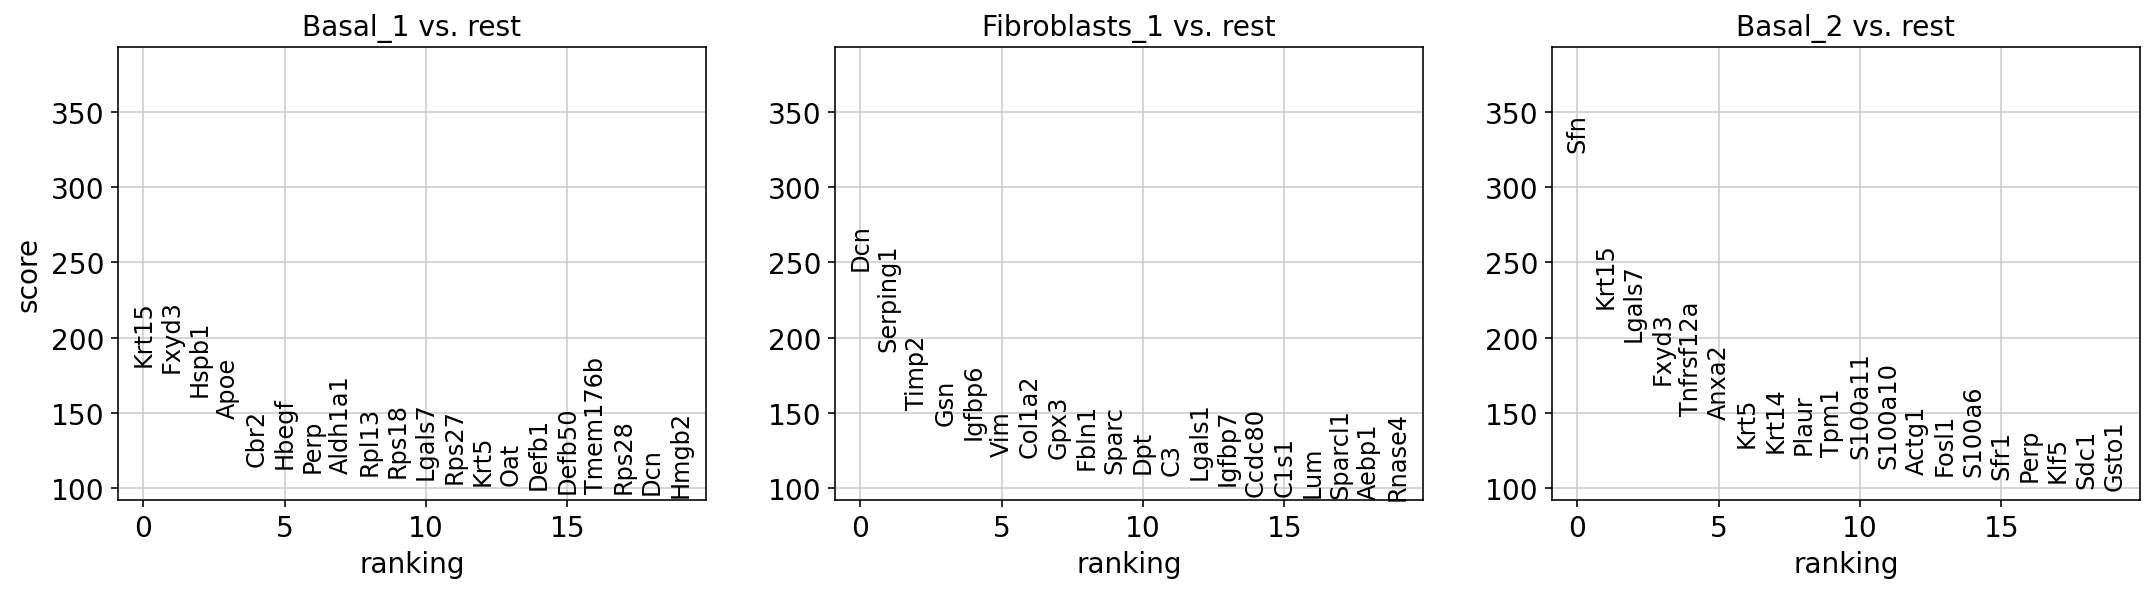

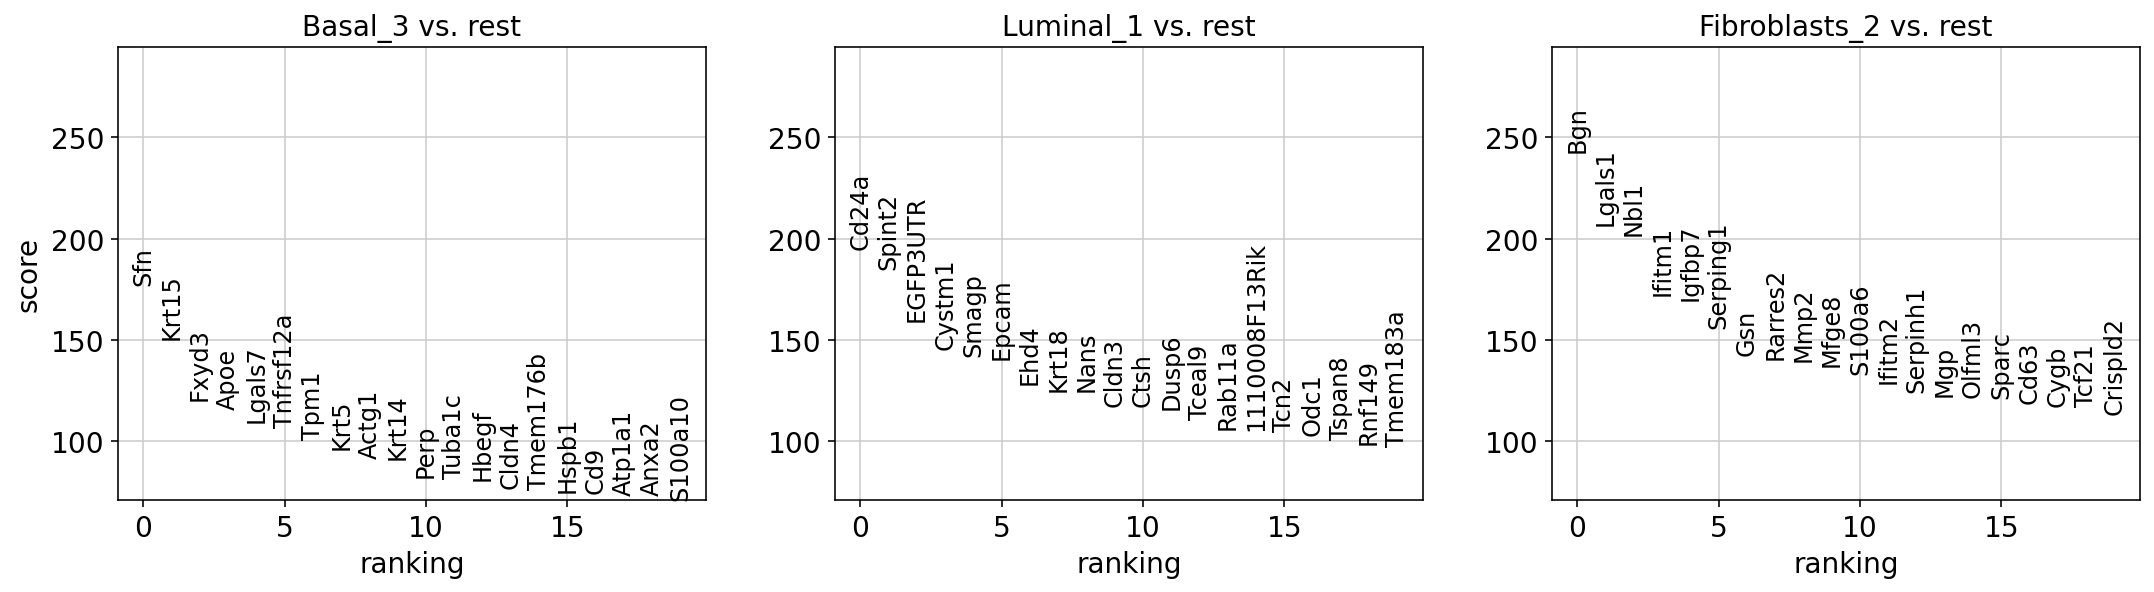

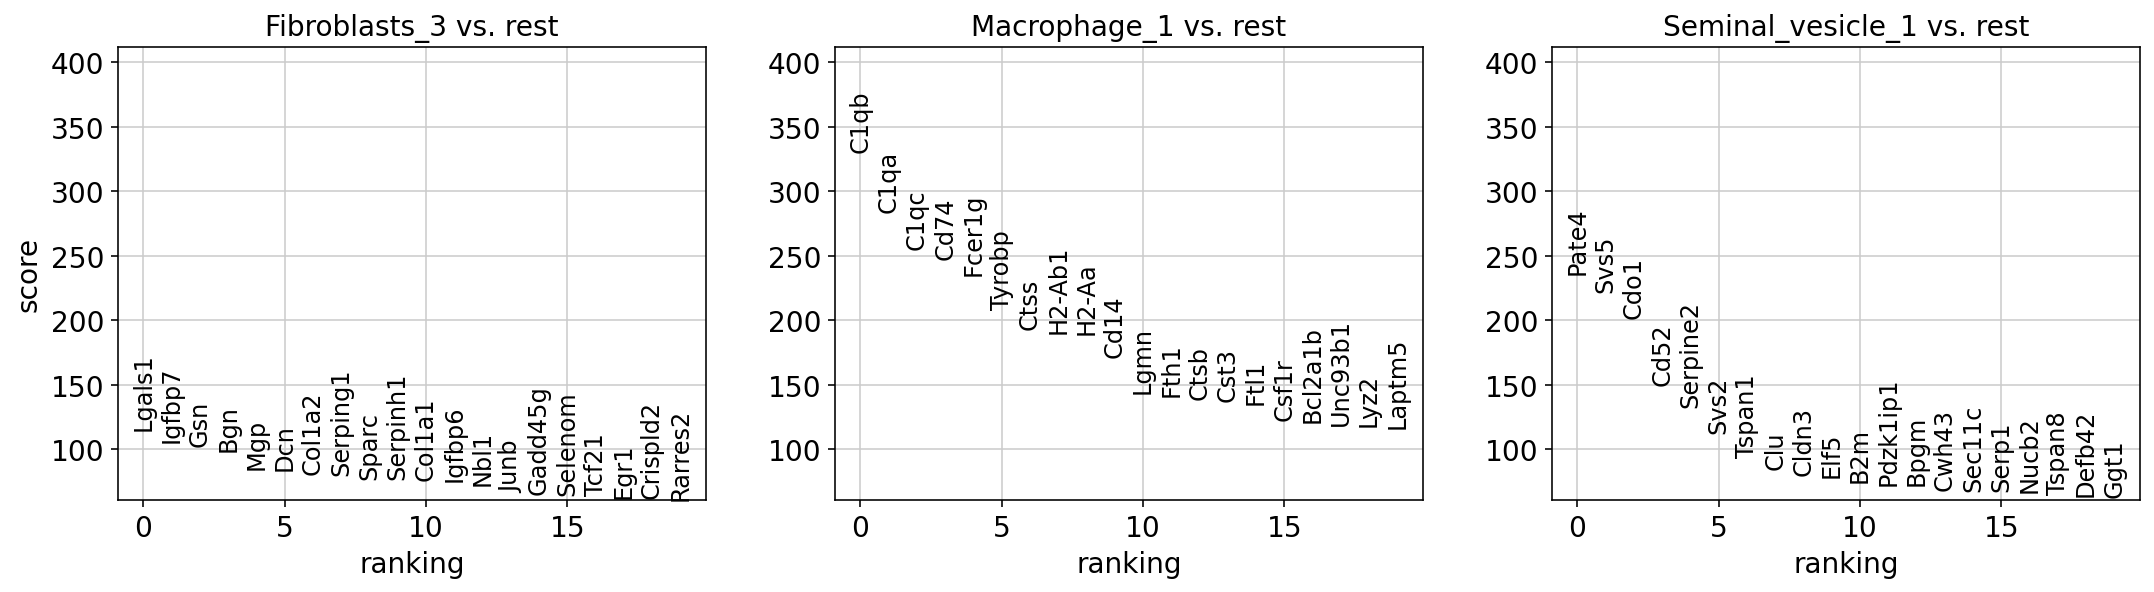

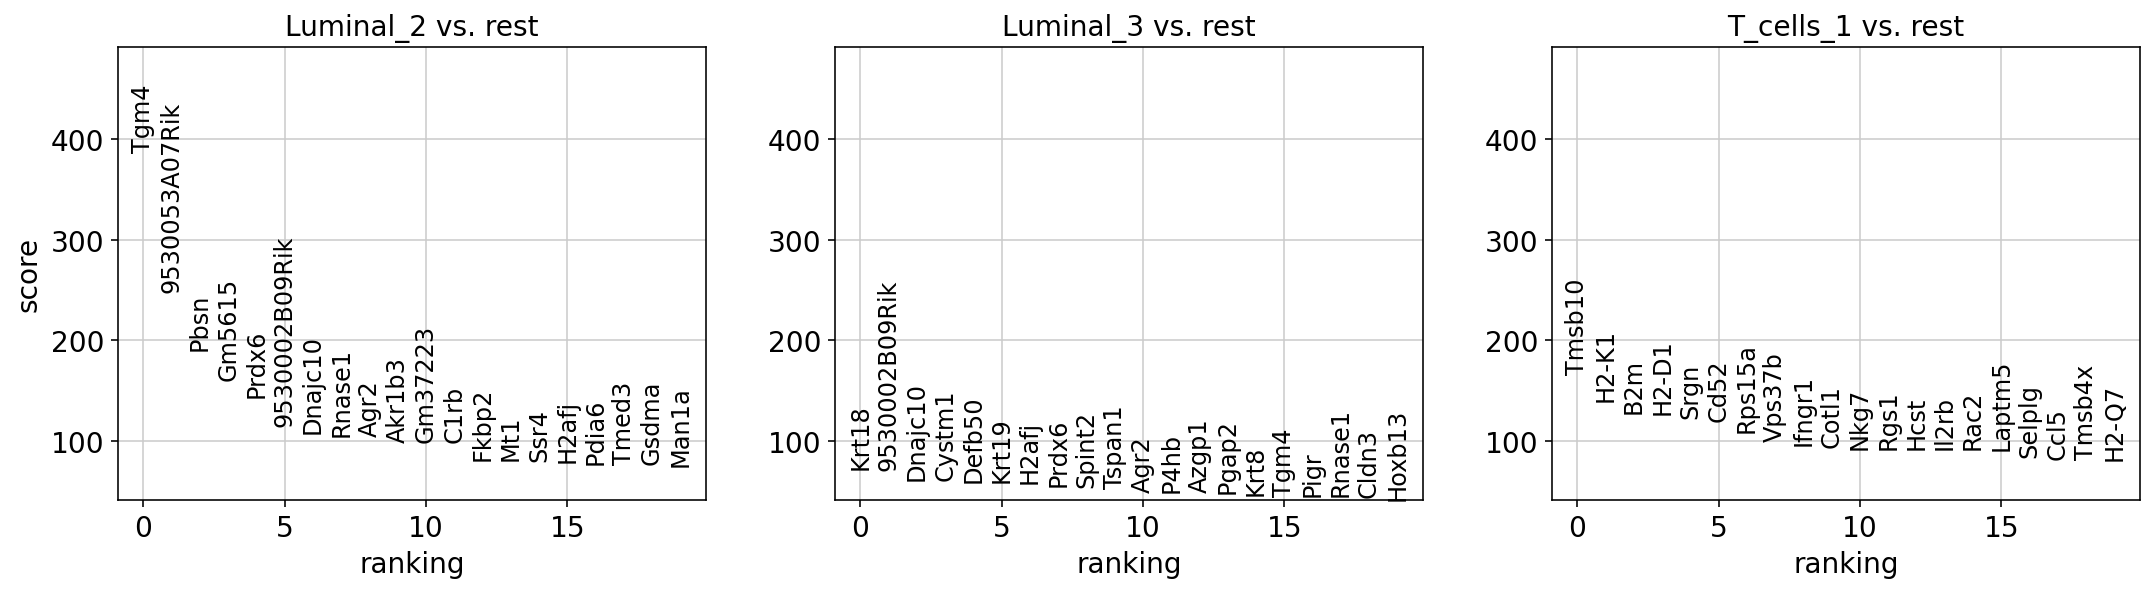

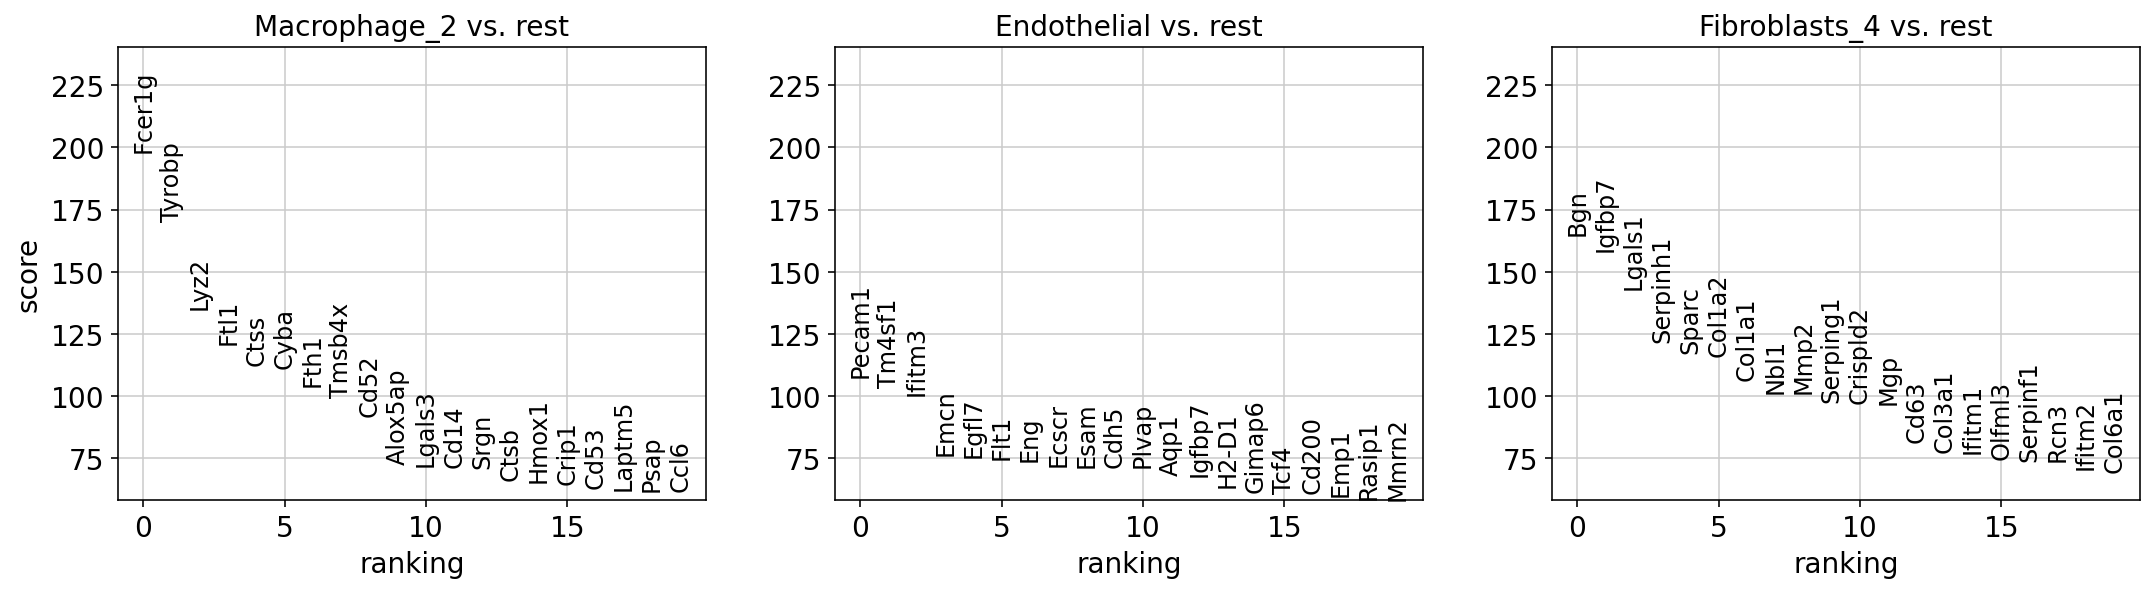

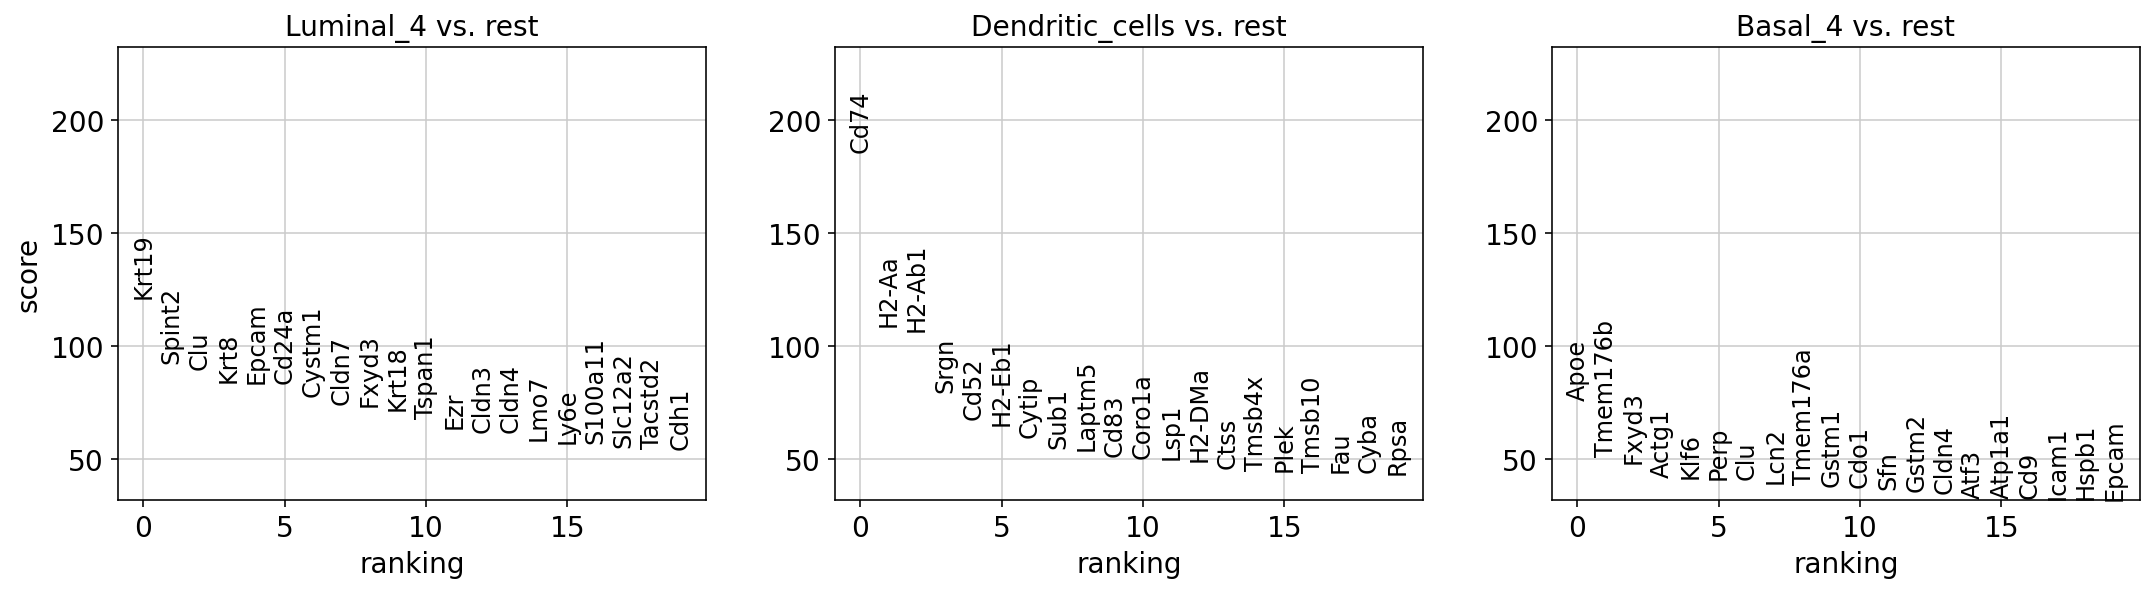

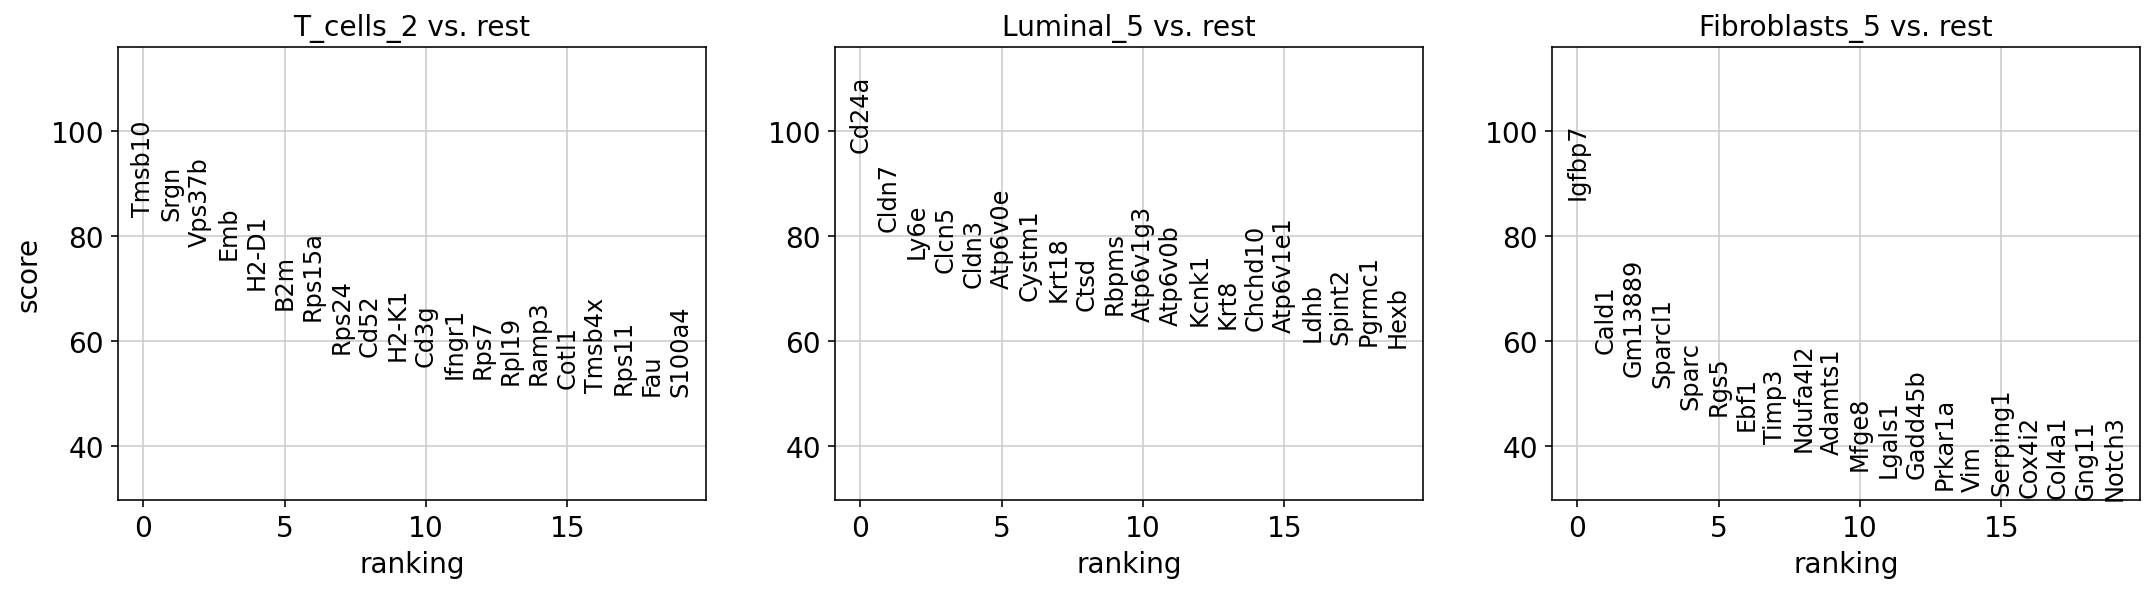

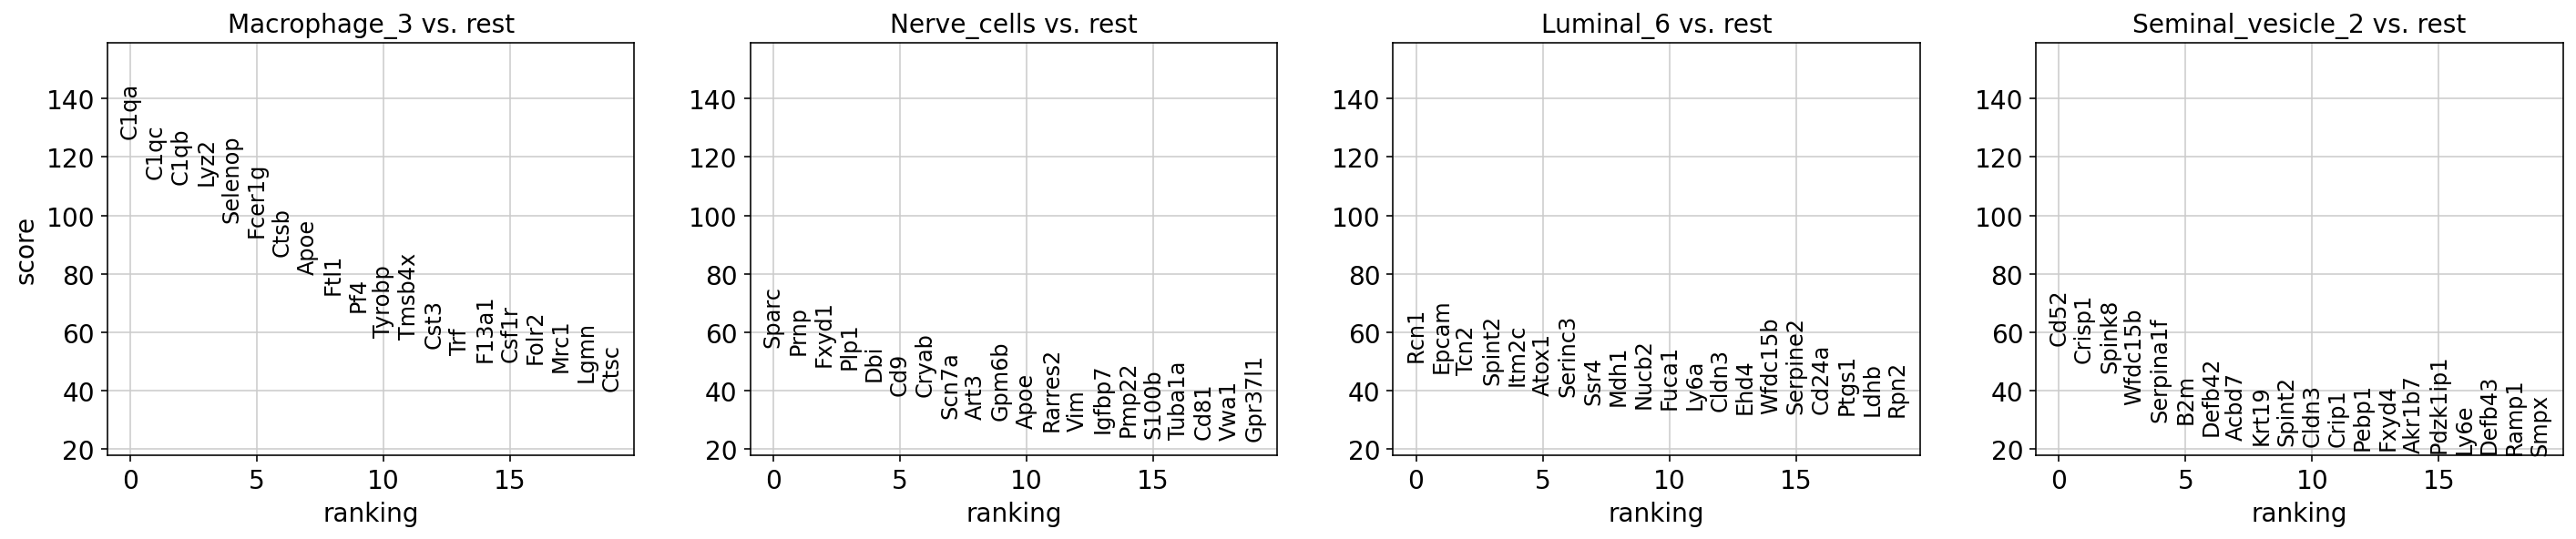

In [206]:
#Plot marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes_r1', groups=['Basal_1','Fibroblasts_1', 'Basal_2'], fontsize=12, save = "basal_1_2.png")
sc.pl.rank_genes_groups(adata, key='rank_genes_r1', groups=['Basal_3', 'Luminal_1', 'Fibroblasts_2'], fontsize=12, save = "luminal_1_2.png")
sc.pl.rank_genes_groups(adata, key='rank_genes_r1', groups=['Fibroblasts_3', 'Macrophage_1', 'Seminal_vesicle_1'], fontsize=12, save = "macrophage_1_2.png")
sc.pl.rank_genes_groups(adata, key='rank_genes_r1', groups=['Luminal_2',  'Luminal_3',  'T_cells_1'], fontsize=12, save = "luminal_3.png")
sc.pl.rank_genes_groups(adata, key='rank_genes_r1', groups=['Macrophage_2', 'Endothelial', 'Fibroblasts_4'], fontsize=12, save = "basal_3.png")
sc.pl.rank_genes_groups(adata, key='rank_genes_r1', groups=['Luminal_4', 'Dendritic_cells', 'Basal_4'], fontsize=12, save = "luminal_5.png")
sc.pl.rank_genes_groups(adata, key='rank_genes_r1', groups=['T_cells_2', 'Luminal_5', 'Fibroblasts_5'], fontsize=12, save = "18-20.png")
sc.pl.rank_genes_groups(adata, key='rank_genes_r1', groups=['Macrophage_3', 'Nerve_cells', 'Luminal_6', 'Seminal_vesicle_2'], fontsize=12, save = "21-23.png")

In [208]:
adata.obs['leiden_r1']

AAACCTGGTGAGTGAC           Macrophage_2
AAATGCCAGAAGATTC           Macrophage_2
AAGACCTGTGAAAGAG              T_cells_1
AATCCAGAGAGGTAGA          Fibroblasts_2
ACACCAAAGCGTGAGT           Macrophage_2
                            ...        
CTCGTCAGTAGAGTGC           Macrophage_2
ATCCGAAAGGTGTGGT-1    Seminal_vesicle_1
CCCAGTTAGGTACTCT      Seminal_vesicle_1
TGCGTGGAGTGGTCCC              Luminal_4
CGTCACTCAAGCTGGA              Luminal_4
Name: leiden_r1, Length: 48926, dtype: category
Categories (25, object): ['Basal_1', 'Fibroblasts_1', 'Basal_2', 'Basal_3', ..., 'Macrophage_3', 'Nerve_cells', 'Luminal_6', 'Seminal_vesicle_2']

It is evident that the two clusters are distinct, yet goblet cell markers may also be expressed in paneth cells at a lower level. 

To identify clusters 0, 1, and 4, we now look at known marker gene expression. It is possible that a known marker is expressed in a cluster although it is not a marker gene for this cluster given its expression in another cluster is higher. This can be the case especially for progenitor cells. We visualize gene expression on the full, batch-corrected data set in adata.

Given the position of clusters 0, 1, and 4 in the UMAP visualization enterocyte and stem cell markers are of particular interest.

In [211]:
adata.var_names

Index(['EGFP3UTR', 'EGFP', 'CreERT2', 'EYFP', 'hETV4', 'Xkr4', 'Rp1', 'Sox17',
       'Mrpl15', 'Lypla1',
       ...
       'Ccl21c', 'CR974586.5', 'AC132444.1', 'Csprs', 'AC125149.3',
       'AC168977.2', 'AC168977.1', 'AC149090.1', 'CAAA01118383.1',
       'CAAA01147332.1'],
      dtype='object', length=19854)

In [34]:
#Categories to rename
adata.obs['leiden_r1'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

In [213]:
adata.obs['leiden_r1'].value_counts()

Basal_1              6901
Fibroblasts_1        4335
Basal_2              3369
Basal_3              3285
Luminal_1            3243
Fibroblasts_2        3231
Fibroblasts_3        3070
Macrophage_1         2410
Seminal_vesicle_1    2279
Luminal_2            2105
Luminal_3            2060
T_cells_1            1932
Macrophage_2         1540
Endothelial          1511
Fibroblasts_4        1448
Luminal_4            1432
Dendritic_cells      1002
Basal_4               912
T_cells_2             876
Luminal_5             752
Fibroblasts_5         507
Macrophage_3          308
Nerve_cells           171
Luminal_6             159
Seminal_vesicle_2      88
Name: leiden_r1, dtype: int64

In [214]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('adata_cluster_annotations.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(adata, f)

In [25]:
import pickle

# Getting back the objects:
with open('adata_cluster_annotations.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    adata = pickle.load(f)

In [215]:
adata.obs['genotype_age'].cat.reorder_categories(['TY_2weeks','TY_4months',
                                                  'EWT_2weeks', 'EWT_4months',
                                                  'E4A_2weeks', 'E4A_4months',
                                                  'E4Ap53_2weeks', 'E4Ap53_4months'], 
                                                      inplace=True)

In [216]:
adata.obs['genotype_age']

AAACCTGGTGAGTGAC           TY_2weeks
AAATGCCAGAAGATTC           TY_2weeks
AAGACCTGTGAAAGAG           TY_2weeks
AATCCAGAGAGGTAGA           TY_2weeks
ACACCAAAGCGTGAGT           TY_2weeks
                           ...      
CTCGTCAGTAGAGTGC      E4Ap53_4months
ATCCGAAAGGTGTGGT-1    E4Ap53_4months
CCCAGTTAGGTACTCT      E4Ap53_4months
TGCGTGGAGTGGTCCC      E4Ap53_4months
CGTCACTCAAGCTGGA      E4Ap53_4months
Name: genotype_age, Length: 48926, dtype: category
Categories (8, object): ['TY_2weeks', 'TY_4months', 'EWT_2weeks', 'EWT_4months', 'E4A_2weeks', 'E4A_4months', 'E4Ap53_2weeks', 'E4Ap53_4months']

In [217]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('adata_cluster_annotations2.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(adata, f)

In [ ]:
import pickle

# Getting back the objects:
with open('adata_cluster_annotations2.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    adata = pickle.load(f)